<a href="https://colab.research.google.com/github/malak26-cloud/Breast-Cancer-Histopathology-Image-Segmentation-using-U-Net/blob/main/Copie_de_base_CNN_model_for_breast_ultrasound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vuppalaadithyasairam_ultrasound_breast_images_for_breast_cancer_path = kagglehub.dataset_download('vuppalaadithyasairam/ultrasound-breast-images-for-breast-cancer')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (2).png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (34)-rotated2-rotated1.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (33)-rotated2-rotated2.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (27)-rotated1-rotated1.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (3)-rotated2-sharpened.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (12)-sharpened.jpg
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (31)-sharpened.jpg
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
train_path= '../input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/train'
test_path='../input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val'

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
# The dataset was downloaded using kagglehub, and the path is stored in this variable
# We need to use this path to construct the correct paths for the train and test directories
train_path = os.path.join(vuppalaadithyasairam_ultrasound_breast_images_for_breast_cancer_path, 'ultrasound breast classification', 'train')
test_path = os.path.join(vuppalaadithyasairam_ultrasound_breast_images_for_breast_cancer_path, 'ultrasound breast classification', 'val')

# Ensure the paths exist before creating the generators
if not os.path.exists(train_path):
    print(f"Error: Training directory not found at {train_path}")
if not os.path.exists(test_path):
    print(f"Error: Validation directory not found at {test_path}")

# Use the previously defined train_datagen for data augmentation
train_generator = train_datagen.flow_from_directory(
    train_path,  # Directory path for training data
    target_size = (224,224), # Resize images to this size
    batch_size = 4, # Number of images per batch
    class_mode = 'binary') # Classification mode for binary classification

# The validation generator setup is already correct
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=False,
    class_mode = 'binary')

Found 8116 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [ ]:
# The dataset was downloaded using kagglehub, and the path is stored in this variable
# We need to use this path to construct the correct paths for the train and test directories
import os # Import the os module here
train_path = os.path.join(vuppalaadithyasairam_ultrasound_breast_images_for_breast_cancer_path, 'ultrasound breast classification', 'train')
test_path = os.path.join(vuppalaadithyasairam_ultrasound_breast_images_for_breast_cancer_path, 'ultrasound breast classification', 'val')

# Ensure the paths exist before creating the generators
if not os.path.exists(train_path):
    print(f"Error: Training directory not found at {train_path}")
if not os.path.exists(test_path):
    print(f"Error: Validation directory not found at {test_path}")

# Use the previously defined train_datagen for data augmentation
train_generator = train_datagen.flow_from_directory(
    train_path,  # Directory path for training data
    target_size = (224,224), # Resize images to this size
    batch_size = 4, # Number of images per batch
    class_mode = 'binary') # Classification mode for binary classification

# The validation generator setup is already correct
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle= False,
    class_mode = 'binary')

Found 8116 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 7, 7, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_2                │ (None, 7, 7, 1536)     │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_3                │ (None, 256)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,178,288 (42.64 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 10,784,047 (41.14 MB)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','AUC','Precision','Recall'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(patience=3,monitor='val_loss')
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    steps_per_epoch= 50,
    callbacks=checkpoint
    )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - AUC: 0.7538 - Precision: 0.5541 - Recall: 0.6959 - accuracy: 0.6741 - loss: 0.6949
Epoch 1: val_accuracy improved from -inf to 0.72444, saving model to best_model.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - AUC: 0.7535 - Precision: 0.5552 - Recall: 0.6957 - accuracy: 0.6744 - loss: 0.6954 - val_AUC: 0.8440 - val_Precision: 0.6450 - val_Recall: 0.8450 - val_accuracy: 0.7244 - val_loss: 0.5274
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - AUC: 0.7598 - Precision: 0.8139 - Recall: 0.6498 - accuracy: 0.7093 - loss: 0.6743
Epoch 2: val_accuracy did not improve from 0.72444
50/50 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - AUC: 0.7595 - Precision: 0.8122 - Recall: 0.6499 - accuracy: 0.7087 - loss: 0.6749 - val_AUC: 0.8136 - val_Precision: 0.7611 - val_Recall: 0.4700 - val_accuracy: 0.6989 - val_loss: 0.5785
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - AUC: 0.7783 - Precision: 0.7673 - Recall: 0.7138 - accuracy: 0.7217 - loss: 0.5572
Epoch 3: val_accuracy improved from 0.72444 to 0.82667, saving model to best_model.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - AUC: 0.7790 - Precision: 0.7680 - Recall: 0.7146 - accuracy: 0.7222 - loss: 0.5574 - val_AUC: 0.9064 - val_Precision: 0.8588 - val_Recall: 0.7300 - val_accuracy: 0.8267 - val_loss: 0.4016
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - AUC: 0.8464 - Precision: 0.6238 - Recall: 0.7426 - accuracy: 0.7177 - loss: 0.5213
Epoch 4: val_accuracy improved from 0.82667 to 0.84778, saving model to best_model.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - AUC: 0.8465 - Precision: 0.6256 - Recall: 0.7427 - accuracy: 0.7183 - loss: 0.5205 - val_AUC: 0.9184 - val_Precision: 0.8363 - val_Recall: 0.8175 - val_accuracy: 0.8478 - val_loss: 0.3586
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - AUC: 0.8281 - Precision: 0.7072 - Recall: 0.7691 - accuracy: 0.7619 - loss: 0.5530
Epoch 5: val_accuracy did not improve from 0.84778
50/50 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - AUC: 0.8284 - Precision: 0.7075 - Recall: 0.7692 - accuracy: 0.7621 - loss: 0.5525 - val_AUC: 0.8674 - val_Precision: 0.7632 - val_Recall: 0.7975 - val_accuracy: 0.8000 - val_loss: 0.4873
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - AUC: 0.8515 - Precision: 0.7030 - Recall: 0.7802 - accuracy: 0.7390 - loss: 0.4988
Epoch 6: val_accuracy did not improve from 0.84778
50/50 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - AUC: 0.8509 - Precision: 0.7029 - Recall: 0.7792 - accuracy: 0.7386 - loss: 0.4995 - val_AUC: 0.8745 - val_Precision: 0.94

50/50 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - AUC: 0.8791 - Precision: 0.7899 - Recall: 0.7392 - accuracy: 0.7520 - loss: 0.4466 - val_AUC: 0.9295 - val_Precision: 0.8492 - val_Recall: 0.8025 - val_accuracy: 0.8489 - val_loss: 0.3425
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - AUC: 0.8752 - Precision: 0.8503 - Recall: 0.7765 - accuracy: 0.7849 - loss: 0.4549
Epoch 12: val_accuracy improved from 0.84889 to 0.85889, saving model to best_model.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - AUC: 0.8746 - Precision: 0.8495 - Recall: 0.7770 - accuracy: 0.7847 - loss: 0.4559 - val_AUC: 0.9240 - val_Precision: 0.8421 - val_Recall: 0.8400 - val_accuracy: 0.8589 - val_loss: 0.3507
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - AUC: 0.7848 - Precision: 0.7598 - Recall: 0.7981 - accuracy: 0.7441 - loss: 0.5568
Epoch 13: val_accuracy did not improve from 0.85889
50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - AUC: 0.7853 - Precision: 0.7595 - Recall: 0.7982 - accuracy: 0.7444 - loss: 0.5563 - val_AUC: 0.8939 - val_Precision: 0.8750 - val_Recall: 0.5950 - val_accuracy: 0.7822 - val_loss: 0.4718
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - AUC: 0.7914 - Precision: 0.7774 - Recall: 0.6939 - accuracy: 0.7003 - loss: 0.5543
Epoch 14: val_accuracy did not improve from 0.85889
50/50 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - AUC: 0.7919 - Precision: 0.7773 - Recall: 0.6949 - accuracy: 0.7010 - loss: 0.5539 - val_AUC: 0.9310 - val_Precision: 

225/225 ━━━━━━━━━━━━━━━━━━━━ 110s 469ms/step


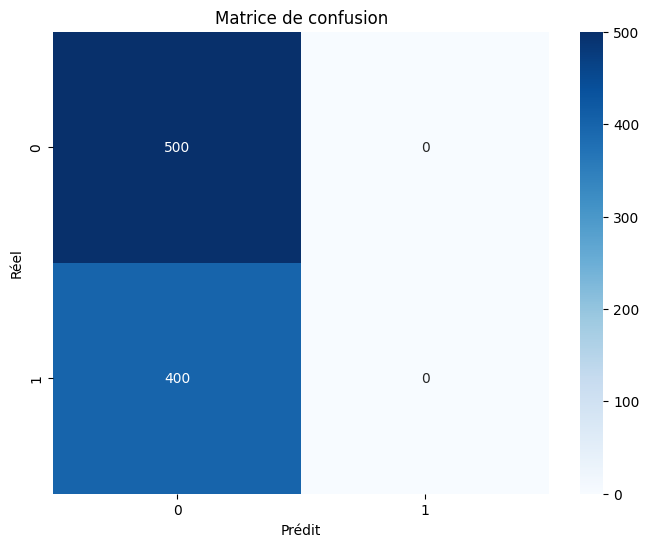

              precision    recall  f1-score   support

      benign       0.56      1.00      0.71       500
   malignant       0.00      0.00      0.00       400

    accuracy                           0.56       900
   macro avg       0.28      0.50      0.36       900
weighted avg       0.31      0.56      0.40       900



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Prédire sur le générateur de validation
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # classes prédites

# Récupérer les vraies étiquettes
y_true = validation_generator.classes

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Affichage
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Rapport détaillé (facultatif)
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))


In [ ]:
model.evaluate(validation_generator)

225/225 ━━━━━━━━━━━━━━━━━━━━ 113s 500ms/step - AUC: 0.4010 - Precision: 0.3422 - Recall: 0.2955 - accuracy: 0.9242 - loss: 0.2278


[0.3685864806175232,
 0.851111114025116,
 0.9219850301742554,
 0.9182389974594116,
 0.7300000190734863]

In [ ]:
model.evaluate(train_generator)

2029/2029 ━━━━━━━━━━━━━━━━━━━━ 1021s 503ms/step - AUC: 0.9194 - Precision: 0.8394 - Recall: 0.8432 - accuracy: 0.8417 - loss: 0.3612


[0.36247509717941284,
 0.8406850695610046,
 0.9187888503074646,
 0.8396342992782593,
 0.8406729102134705]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
[[0.00571887]]
THE UPLOADED IMAGE IS SUSPECTED AS: Benign


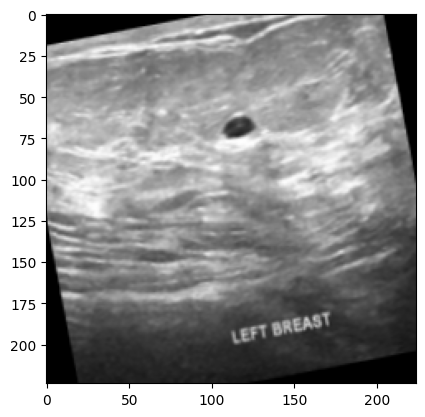

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import os # Import the os module if not already imported

# Construct the full path to the image using the variable from kagglehub download
image_path = os.path.join(vuppalaadithyasairam_ultrasound_breast_images_for_breast_cancer_path, 'ultrasound breast classification', 'val', 'benign', 'benign (1)-rotated1-rotated1.png')

# Load the image using the constructed path
img = load_img(image_path, target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Benign"
else:
      op="Malignant"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))

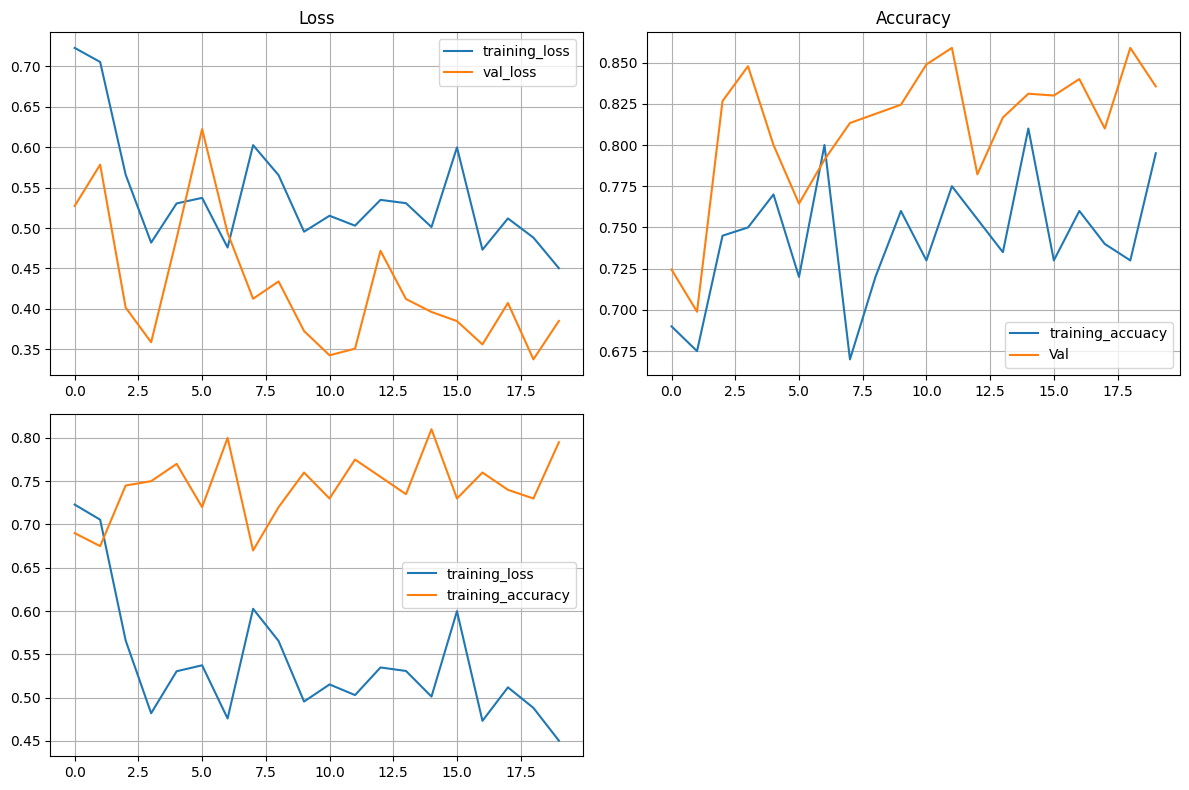

In [ ]:
import matplotlib.pyplot as plt

# Supposons que tu as entraîné le modèle :
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plt.figure(figsize=(12, 8))

# Loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='training_accuacy')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()
plt.grid(True)

# Precision
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


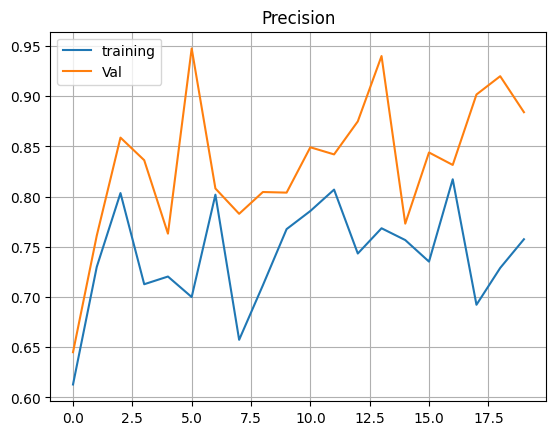

In [ ]:
plt.plot(history.history['Precision'], label='training') # Use 'Precision' instead of 'precision'
plt.plot(history.history['val_Precision'], label='Val') # Use 'val_Precision' instead of 'val_precision'
plt.title("Precision")
plt.legend()
plt.grid(True)

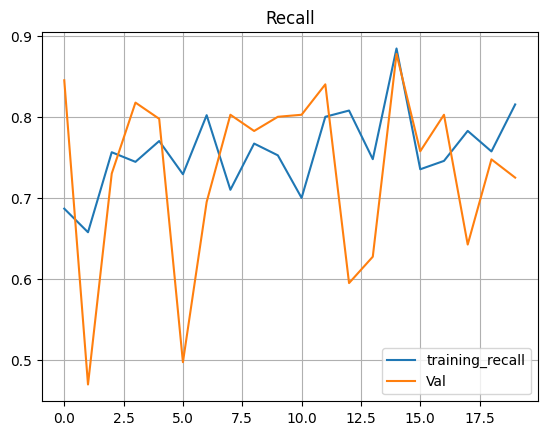

In [ ]:
# Recall

plt.plot(history.history['Recall'], label='training_recall') # Changed 'recall' to 'Recall'
plt.plot(history.history['val_Recall'], label='Val') # Changed 'val_recall' to 'val_Recall'
plt.title("Recall")
plt.legend()
plt.grid(True)

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')
